In [1]:
import torch
import numpy as np
import pandas as pd
import random
# from models_A import preprocessing_from_matlab
from scipy.io.matlab import loadmat
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from models_A import ModelA, ModelAN
from seaborn import set_theme

# plt.style.use("duarte")
# %matplotlib widget

In [2]:
path_to_states = "/home/gabriel/Documents/matlab_files/xs_all.mat"
path_to_forces = "/home/gabriel/Documents/matlab_files/tau_all.mat"

states_mat = loadmat(path_to_states)
forces_mat = loadmat(path_to_forces)

In [3]:
random_force_denorm = forces_mat["tau_all"][950][0].T
pd.DataFrame(random_force_denorm).tail(3)

,0,1,2,3
19998,21.584105,-0.000052,0.000027,-8.422898e-07
19999,21.584105,-0.000052,0.000027,-8.411041e-07
20000,21.584105,-0.000052,0.000027,-8.399150e-07


In [4]:
def preprocessing_from_matlab(data, n=0):
    key = list(data.keys())[-1]
    all_data = data[key].squeeze()
    all_data_normalized = []
    all_data_norms = []

    for data in all_data:
        data_normalized, data_norms = normalize(X=data.T[n:],
                                                axis=0,
                                                return_norm=True)
        data_norms
        all_data_normalized.append(data_normalized)
        all_data_norms.append(data_norms)

    return all_data_normalized, all_data_norms

In [5]:
states, states_norms = preprocessing_from_matlab(states_mat, n=500)
forces, forces_norms = preprocessing_from_matlab(forces_mat, n=500)

In [6]:
len(states), len(forces)

(1000, 1000)

In [7]:
states_df = pd.DataFrame(states[random.randrange(0,1000)]).round(6)
forces_df = pd.DataFrame(forces[random.randrange(0,1000)]).round(6)
display(states_df.tail())
display(forces_df.tail())

,0,1,2,3,4,5,6,7,8,9,10,11
19496,-0.008890,0.004411,0.0,0.000720,0.002072,-0.0,0.008479,0.011411,0.007303,0.006889,-0.002913,0.000001
19497,-0.008895,0.004403,0.0,0.000719,0.002073,-0.0,0.008473,0.011414,0.007303,0.006892,-0.002907,0.000001
19498,-0.008899,0.004394,0.0,0.000717,0.002074,-0.0,0.008467,0.011417,0.007303,0.006896,-0.002902,0.000001
19499,-0.008904,0.004386,0.0,0.000716,0.002075,-0.0,0.008460,0.011420,0.007303,0.006900,-0.002896,0.000001
19500,-0.008908,0.004378,0.0,0.000715,0.002076,-0.0,0.008454,0.011423,0.007303,0.006903,-0.002890,0.000001


,0,1,2,3
19496,0.007181,-0.000101,0.000132,-0.000001
19497,0.007181,-0.000101,0.000132,-0.000001
19498,0.007181,-0.000101,0.000132,-0.000001
19499,0.007181,-0.000101,0.000132,-0.000001
19500,0.007181,-0.000101,0.000131,-0.000001


In [8]:
random_state, random_state_norm = states[950], states_norms[950]
random_force, random_force_norm = forces[950], forces_norms[950]

In [9]:
display(pd.DataFrame(random_state).round(5).head())
display(pd.DataFrame(random_force).round(5).head())

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.04077,0.03817,0.04215,0.06696,-0.06428,0.09182,0.00314,0.00277,0.00211,-0.01403,-0.00506,-0.03446
1,0.04076,0.03819,0.04215,0.06697,-0.06413,0.09164,0.00316,0.00278,0.00211,-0.01359,-0.00528,-0.03349
2,0.04075,0.03822,0.04215,0.06697,-0.06398,0.09146,0.00317,0.00279,0.00212,-0.01314,-0.00549,-0.03252
3,0.04074,0.03824,0.04214,0.06697,-0.06382,0.09126,0.00318,0.00281,0.00213,-0.01269,-0.00571,-0.03155
4,0.04073,0.03826,0.04214,0.06696,-0.06367,0.09106,0.00319,0.00282,0.00213,-0.01225,-0.00593,-0.03059


,0,1,2,3
0,0.00716,0.00466,0.04951,-0.01206
1,0.00715,0.00418,0.04939,-0.01286
2,0.00715,0.00371,0.04925,-0.01365
3,0.00715,0.00323,0.04912,-0.01444
4,0.00715,0.00275,0.04897,-0.01523


In [10]:
model = ModelA()
model.load_state_dict(torch.load("model.pt"))
model_norms = ModelAN()
model_norms.load_state_dict(torch.load("model_norms.pt"))

<All keys matched successfully>

In [11]:
model.eval()
with torch.inference_mode():
    normalized_forces = model(torch.tensor(random_state, dtype=torch.float32))

In [12]:
model_norms.eval()
with torch.inference_mode():
    forces_norms = model_norms(torch.tensor(random_state_norm, dtype=torch.float32))

In [13]:
forces = []
for i in range(normalized_forces.shape[-1]):
    force_denorm = normalized_forces[:,i]*forces_norms[i]
    force_denorm = force_denorm.numpy()
    forces.append(force_denorm)
forces = np.array(forces).T

In [14]:
lenght = len(random_force_denorm[:,0][500:])
lenght

19501

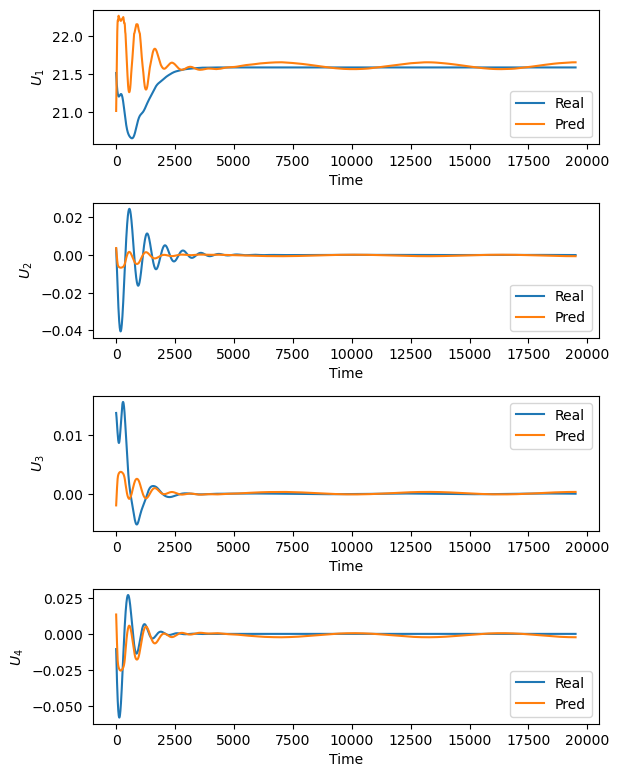

In [15]:
t = np.arange(0,lenght,1)

cm=1/2.54
fig, axs = plt.subplots(4,1, figsize=(16*cm,20*cm))
for i, ax in enumerate(axs.flatten()):
    # if i == 2:
    #     x1, x2, y1, y2 = 0, 2000, -0.01, 0.02  # subregion of the original image
    #     axins = ax.inset_axes([0.25, 0.25, 0.6, 0.6],xlim=(x1, x2), ylim=(y1,y2), xticklabels=[], yticklabels=[])
    #     axins.plot(t, forces[:,i])
    #     axins.plot(t, random_force_denorm[:,i][500:])
    #     ax.indicate_inset_zoom(axins, edgecolor="black")
    # ax.set_xlim(-100,5000)
    ax.plot(t, random_force_denorm[:,i][500:], label="Real")
    ax.plot(t, forces[:,i], label="Pred")
    ax.set_xlabel("Time")
    ax.set_ylabel(f"$U_{i+1}$")
    # ax.ticklabel_format(style="sci",
    #                     scilimits=(0,0),
    #                     useMathText=True,
    #                     axis="x")
    ax.legend()

fig.tight_layout()
fig.savefig("../../../report/figures/4results/uav/forces_denormalized.pdf", backend="pgf")